In [52]:
import json 
import h5py

# Read in necessary information to visualize 
path = "/home/houda/images/matrix_reps/1000D_l1/"

with open(path + "top50.json", "r") as f:
    top50 = json.loads(f.read())
    
with open(path + "mscoco_mapping.json", "r") as f:
    mscoco_mapping = json.loads(f.read())
    
reverse_mscoco_mapping = {v:k for k, v in mscoco_mapping.items()}

with open("nodes_new.json", "r") as f:
    nodes = json.loads(f.read())
    
sorted_node_names = [v['ms'].split(":")[-1] for _, v in sorted(nodes.items())]

In [14]:
with open(path + "top50_old.json", "r") as f:
    top50_old = json.loads(f.read())

In [15]:
print(list(top50.items())[0])
print(list(top50_old.items())[0])

('0', [[2.413614273071289, 2.4627888202667236, 2.469000816345215, 2.4696555137634277, 2.4724185466766357, 2.477329730987549, 2.4792556762695312, 2.4851133823394775, 2.4861879348754883, 2.4967401027679443, 2.510838508605957, 2.51684308052063, 2.523726224899292, 2.5281293392181396, 2.5282952785491943, 2.529512882232666, 2.5335752964019775, 2.5349936485290527, 2.5379419326782227, 2.538165807723999, 2.539605140686035, 2.540168285369873, 2.540539026260376, 2.5407795906066895, 2.5439422130584717, 2.544088840484619, 2.544985055923462, 2.5451772212982178, 2.549286127090454, 2.5516059398651123, 2.5528621673583984, 2.5549240112304688, 2.55662202835083, 2.5567667484283447, 2.5577614307403564, 2.5588624477386475, 2.561671257019043, 2.5633203983306885, 2.565502166748047, 2.5673210620880127, 2.568225383758545, 2.569753646850586, 2.571234941482544, 2.5722084045410156, 2.5736348628997803, 2.5736806392669678, 2.574000120162964, 2.574605941772461, 2.575533628463745, 2.576204538345337], [83735, 2849, 300

In [40]:
for k, v in top50.items():
    if sorted_node_names[v[1][0]] == "still_life" and sorted_node_names[v[1][1]] == "Nepenthes" and sorted_node_names[v[1][2]] == "coconut":
        print(k)
    

39984


In [31]:
list(mscoco_mapping.items())[20611]

('000000046114', 20611)

In [33]:
list(top50.items())[:10][0][1]

[[0.9968957901000977,
  0.9968938231468201,
  0.9968892931938171,
  0.9968869686126709,
  0.996874213218689,
  0.9968727827072144,
  0.9968690276145935,
  0.9968662858009338,
  0.9968655705451965,
  0.9968621730804443,
  0.99686199426651,
  0.996859610080719,
  0.9968580007553101,
  0.9968568086624146,
  0.9968525767326355,
  0.9968523979187012,
  0.9968520402908325,
  0.9968504905700684,
  0.9968504905700684,
  0.9968494772911072,
  0.9968486428260803,
  0.9968478679656982,
  0.9968475699424744,
  0.9968469738960266,
  0.9968464970588684,
  0.9968459606170654,
  0.9968457221984863,
  0.996845543384552,
  0.9968454241752625,
  0.9968448877334595,
  0.9968445301055908,
  0.996841549873352,
  0.9968408942222595,
  0.9968402981758118,
  0.9968394637107849,
  0.9968379735946655,
  0.9968374967575073,
  0.9968374371528625,
  0.9968372583389282,
  0.9968367218971252,
  0.9968358874320984,
  0.9968342781066895,
  0.9968336820602417,
  0.996833086013794,
  0.9968326687812805,
  0.9968324303627

In [53]:
import matplotlib.pyplot as plt 

def gather_topn(n, top50):
    val_top_sims = []
    val_top_idx = []
    for value in top50.values():
        similarities = value[0] 
        indices = value[1]
        val_top_sims.append(similarities[:n])
        val_top_idx.append(indices[:n])
    return val_top_sims, val_top_idx

sims_1, idx_1 = gather_topn(1, top50)
sims_5, idx_5 = gather_topn(5, top50)
sims_10, idx_10 = gather_topn(10, top50)
sims_50, idx_50 = gather_topn(50, top50)

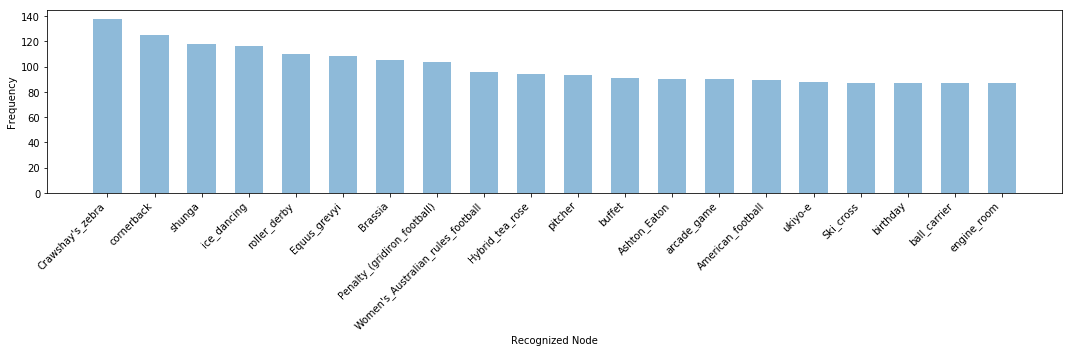

In [54]:
from collections import Counter
import numpy as np

def flatten(l):
    return [item for sublist in l for item in sublist]
    
def plot_freqs(list_of_values, n): 
    dict_counts = Counter(list_of_values).most_common()
    x = []
    y = []
    for k, v in dict_counts:
        x.append(k)
        y.append(v)
    x = x[:20]
    y = y[:20]
    x = [sorted_node_names[index] for index in x]
    y_pos = np.arange(len(x))
    plt.figure(figsize=(15, 5))
    plt.bar(y_pos, y, align="center", alpha=0.5, width=0.6)
    plt.xticks(y_pos, x, rotation=45, ha="right")
    plt.ylabel("Frequency")
    plt.xlabel("Recognized Node")
    plt.tight_layout()
    plt.savefig("images_analysis/1000D_l1_top" + str(n) + ".png")
    plt.show()
    
plot_freqs(flatten(idx_1), 1)

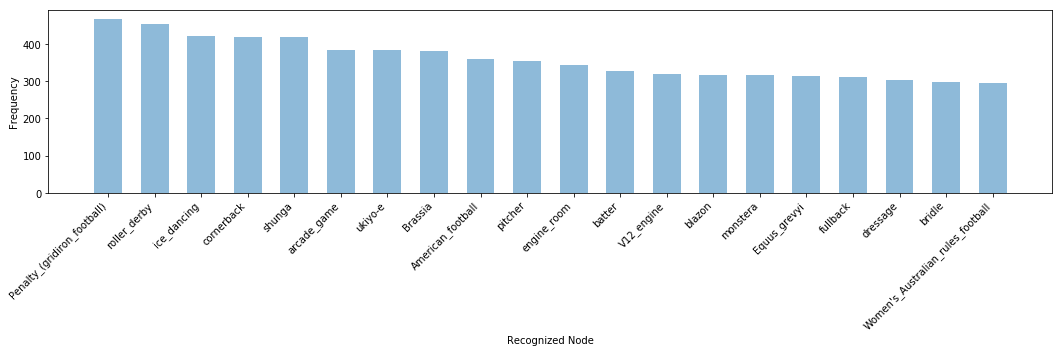

In [55]:
plot_freqs(flatten(idx_5), 5)

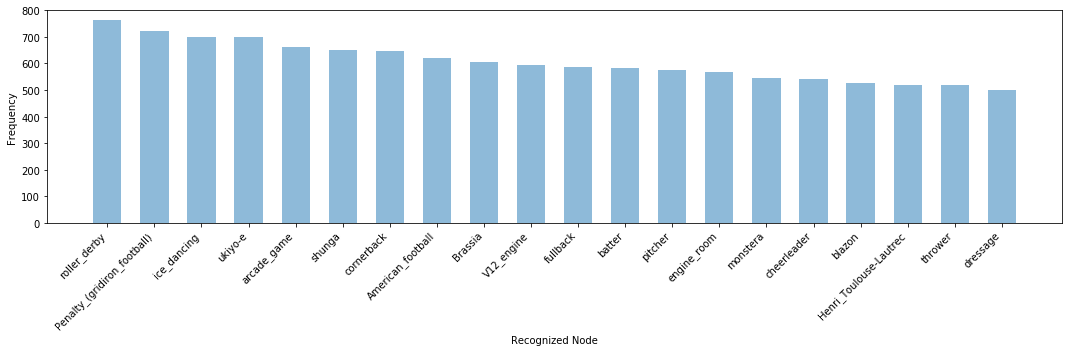

In [56]:
plot_freqs(flatten(idx_10), 10)

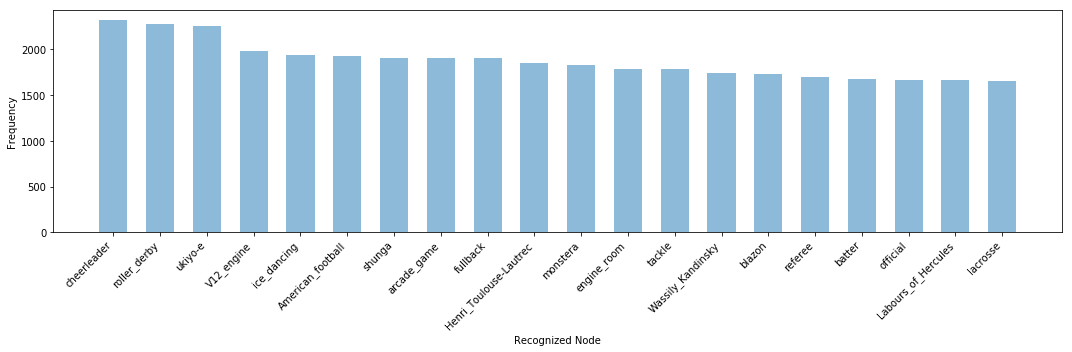

In [57]:
plot_freqs(flatten(idx_50), 50)

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000046114.jpg


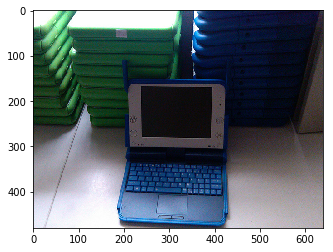

[0.0026714850682765245, 0.002678888849914074, 0.0026926363352686167, 0.0027656294405460358, 0.002790892729535699, 0.0028116933535784483, 0.0028460929170250893, 0.002851407276466489, 0.00285536446608603, 0.002869135932996869, 0.0028768007177859545, 0.0028851849492639303, 0.00289071979932487, 0.002893098397180438, 0.002898281905800104, 0.0028991797007620335, 0.0029043557588011026, 0.0029119295068085194, 0.0029180622659623623, 0.002920942846685648, 0.0029358090832829475, 0.0029417225159704685, 0.0029472969472408295, 0.0029528122395277023, 0.0029570546466857195, 0.0029577682726085186, 0.002968111541122198, 0.002976924879476428, 0.002989273751154542, 0.0029898486100137234, 0.0029951846227049828, 0.0029968535527586937, 0.003004621248692274, 0.0030087416525930166, 0.0030127493664622307, 0.0030172080732882023, 0.0030229566618800163, 0.0030296985059976578, 0.003030192106962204, 0.003035003552213311, 0.0030369553714990616, 0.0030385928694158792, 0.003040898125618696, 0.0030422599520534277, 0.003

In [58]:
import random 
from PIL import Image

mscoco_path = "/home/houda/kth-sml-project/mscoco_data/data/train2014/"

images = ["000000046114", "000000211852", "000000445140", "000000574696"]

def show_exact_example(img):
    idx = mscoco_mapping[img]
    url = mscoco_path + "COCO_train2014_" + img + ".jpg"
    print(url)
    im = np.array(Image.open(url))
    plt.imshow(im)
    plt.show()
    sims, idxes = top50[str(idx)]
    print(sims)
    print([sorted_node_names[i] for i in idxes])
    
show_exact_example(images[0])

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000211852.jpg


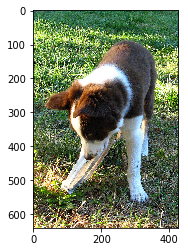

[0.002627723850309849, 0.002649425296112895, 0.002702266676351428, 0.0027263667434453964, 0.0028805744368582964, 0.0029446398839354515, 0.002945374697446823, 0.002953135408461094, 0.002997941803187132, 0.0030443936120718718, 0.0030514502432197332, 0.003067999379709363, 0.003069056663662195, 0.003084904747083783, 0.003133778925985098, 0.00313380709849298, 0.003145618597045541, 0.003146493574604392, 0.0031595213804394007, 0.003160100430250168, 0.0031609574798494577, 0.0031631365418434143, 0.0031721030827611685, 0.003175610676407814, 0.0031894613057374954, 0.003194197313860059, 0.0031952597200870514, 0.0031985898967832327, 0.00320955622009933, 0.0032097757793962955, 0.003211341565474868, 0.0032114305067807436, 0.003214669181033969, 0.0032240808941423893, 0.0032255174592137337, 0.0032279742881655693, 0.003232965711504221, 0.0032344094943255186, 0.003242085687816143, 0.0032425730023533106, 0.003244073363021016, 0.003245527157559991, 0.0032469863072037697, 0.003249366534873843, 0.00324989017

In [59]:
show_exact_example(images[1])

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000445140.jpg


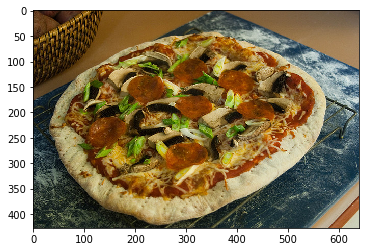

[0.001739364699460566, 0.0017843730747699738, 0.0018093229737132788, 0.0018355874344706535, 0.0018391364719718695, 0.0018429869087412953, 0.0018437565304338932, 0.0018465281464159489, 0.0018468309426680207, 0.001853058347478509, 0.001855907728895545, 0.0018566891085356474, 0.0018601847114041448, 0.001861995318904519, 0.0018637203611433506, 0.0018688042182475328, 0.0018730495357885957, 0.0018752997275441885, 0.001878855167888105, 0.0018792105838656425, 0.0018795045325532556, 0.0018796101212501526, 0.0018841595156118274, 0.0018859656993299723, 0.0018866641912609339, 0.0018880063435062766, 0.0018910947255790234, 0.001892165862955153, 0.0018925381591543555, 0.001894589513540268, 0.0018974824342876673, 0.001897875452414155, 0.0019004989881068468, 0.0019042378989979625, 0.0019045018125325441, 0.001905021141283214, 0.0019073085859417915, 0.0019079772755503654, 0.001912991632707417, 0.0019133856985718012, 0.001916901906952262, 0.001918134861625731, 0.001918491441756487, 0.0019209785386919975, 

In [60]:
show_exact_example(images[2])

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000574696.jpg


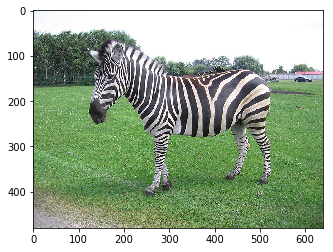

[0.003781063947826624, 0.003824743675068021, 0.003847910091280937, 0.003944813273847103, 0.003967123571783304, 0.0039983647875487804, 0.004001548979431391, 0.004027402959764004, 0.004040778614580631, 0.004042864311486483, 0.00408201152458787, 0.0040829842910170555, 0.004093854688107967, 0.004107205662876368, 0.004122485872358084, 0.004127641208469868, 0.004155285656452179, 0.004172320943325758, 0.004178754054009914, 0.004196038469672203, 0.004228401929140091, 0.004229238722473383, 0.004237149842083454, 0.004275383427739143, 0.004280891735106707, 0.004292087629437447, 0.004300095606595278, 0.004300200846046209, 0.004306824877858162, 0.004319936968386173, 0.004336465150117874, 0.004347645677626133, 0.004353876691311598, 0.0043694754131138325, 0.004372543189674616, 0.004384193103760481, 0.004393174313008785, 0.004397808574140072, 0.00440402515232563, 0.0044098407961428165, 0.004428461659699678, 0.0044335671700537205, 0.00445040687918663, 0.004468678962439299, 0.004486679565161467, 0.00448

In [61]:
show_exact_example(images[3])

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000021782.jpg


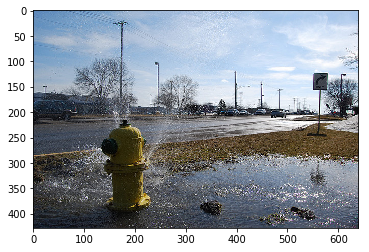

[0.997417688369751, 0.9974061250686646, 0.9974026083946228, 0.9974002242088318, 0.9973998665809631, 0.9973982572555542, 0.9973964691162109, 0.9973946213722229, 0.9973935484886169, 0.9973865151405334, 0.997384250164032, 0.9973825216293335, 0.9973813891410828, 0.9973810315132141, 0.997380793094635, 0.997378945350647, 0.997378945350647, 0.997378945350647, 0.9973779320716858, 0.9973779320716858, 0.9973775148391724, 0.9973767399787903, 0.9973761439323425, 0.9973758459091187, 0.9973756074905396, 0.9973753690719604, 0.9973753094673157, 0.9973745346069336, 0.9973744750022888, 0.9973737001419067, 0.9973730444908142, 0.9973728060722351, 0.9973720908164978, 0.9973717927932739, 0.9973711967468262, 0.9973711371421814, 0.9973709583282471, 0.9973706007003784, 0.9973703622817993, 0.997370183467865, 0.9973701238632202, 0.9973701238632202, 0.9973698258399963, 0.9973694682121277, 0.9973693490028381, 0.9973692893981934, 0.9973688721656799, 0.9973688721656799, 0.9973684549331665, 0.9973683953285217]
['Germ

In [13]:
import random 
from PIL import Image

mscoco_path = "/home/houda/kth-sml-project/mscoco_data/data/train2014/"

# Print mscoco image and the most similar nodes
def show_example():
    img = random.choice(list(mscoco_mapping.keys()))
    idx = mscoco_mapping[img]
    url = mscoco_path + "COCO_train2014_" + img + ".jpg"
    print(url)
    im = np.array(Image.open(url))
    plt.imshow(im)
    plt.show()
    sims, idxes = top50[str(idx)]
    print(sims)
    print([sorted_node_names[i] for i in idxes])
    
show_example()

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000036996.jpg


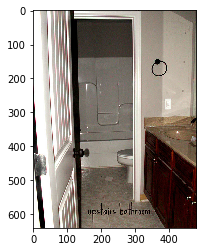

[0.9975574612617493, 0.9975398182868958, 0.9975290894508362, 0.9975267052650452, 0.9975266456604004, 0.9975214600563049, 0.9975171089172363, 0.9975127577781677, 0.9975124001502991, 0.9975101947784424, 0.9975099563598633, 0.9975084662437439, 0.9975022673606873, 0.9975017309188843, 0.9975011348724365, 0.997501015663147, 0.9975002408027649, 0.9975001811981201, 0.997499942779541, 0.997499942779541, 0.9974989295005798, 0.9974987506866455, 0.997498631477356, 0.9974977970123291, 0.9974973797798157, 0.9974969029426575, 0.9974962472915649, 0.9974962472915649, 0.9974961876869202, 0.9974945187568665, 0.9974942207336426, 0.9974940419197083, 0.9974932670593262, 0.9974932670593262, 0.997491180896759, 0.997488796710968, 0.9974885582923889, 0.9974874258041382, 0.9974871873855591, 0.9974830150604248, 0.9974822402000427, 0.9974815845489502, 0.9974815249443054, 0.9974810481071472, 0.9974806308746338, 0.9974803328514099, 0.9974802136421204, 0.997477650642395, 0.9974775314331055, 0.9974774122238159]
['door

In [22]:
import random 
from PIL import Image

mscoco_path = "/home/houda/kth-sml-project/mscoco_data/data/train2014/"

# Print mscoco image and the most similar nodes
def show_example():
    img = random.choice(list(mscoco_mapping.keys()))
    idx = mscoco_mapping[img]
    url = mscoco_path + "COCO_train2014_" + img + ".jpg"
    print(url)
    im = np.array(Image.open(url))
    plt.imshow(im)
    plt.show()
    sims, idxes = top50[str(idx)]
    print(sims)
    print([sorted_node_names[i] for i in idxes])
    
show_example()

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000136983.jpg


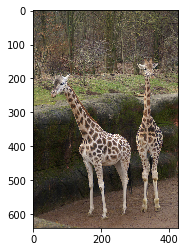

[0.9973556995391846, 0.997346818447113, 0.9973455667495728, 0.9973441362380981, 0.9973427057266235, 0.9973421692848206, 0.9973403215408325, 0.9973402619361877, 0.9973384141921997, 0.9973378777503967, 0.997337281703949, 0.9973344206809998, 0.9973325133323669, 0.9973318576812744, 0.9973316788673401, 0.9973316788673401, 0.9973304867744446, 0.9973292946815491, 0.9973291754722595, 0.99732506275177, 0.9973242282867432, 0.9973241686820984, 0.9973228573799133, 0.9973223805427551, 0.9973199367523193, 0.9973198771476746, 0.997319757938385, 0.9973193407058716, 0.9973192811012268, 0.9973189830780029, 0.9973181486129761, 0.9973179697990417, 0.997317373752594, 0.997317373752594, 0.9973166584968567, 0.9973164796829224, 0.9973163604736328, 0.9973157048225403, 0.9973157048225403, 0.997315526008606, 0.9973154664039612, 0.9973148107528687, 0.9973147511482239, 0.9973145723342896, 0.9973141551017761, 0.9973138570785522, 0.9973135590553284, 0.9973134994506836, 0.9973132610321045, 0.9973130822181702]
['griff

In [32]:
show_example()

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000445140.jpg


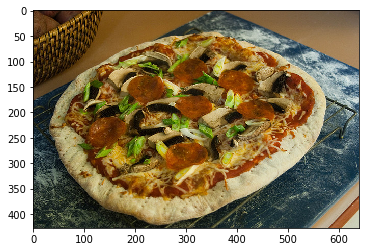

[0.9974984526634216, 0.9974902868270874, 0.997489333152771, 0.997488260269165, 0.9974868893623352, 0.9974745512008667, 0.9974691867828369, 0.9974594116210938, 0.9974504113197327, 0.9974453449249268, 0.9974434971809387, 0.9974419474601746, 0.9974412322044373, 0.9974408149719238, 0.9974400401115417, 0.997438371181488, 0.9974380135536194, 0.9974357485771179, 0.9974347352981567, 0.9974324703216553, 0.997432291507721, 0.9974313974380493, 0.9974310398101807, 0.9974299073219299, 0.9974293112754822, 0.9974291324615479, 0.9974283576011658, 0.9974278807640076, 0.9974277019500732, 0.9974272847175598, 0.9974269270896912, 0.9974265694618225, 0.9974262714385986, 0.9974260926246643, 0.9974259734153748, 0.9974257946014404, 0.997425377368927, 0.9974231719970703, 0.997422993183136, 0.9974218010902405, 0.9974216222763062, 0.9974214434623718, 0.9974207878112793, 0.9974206686019897, 0.9974194765090942, 0.9974176287651062, 0.997416615486145, 0.9974162578582764, 0.9974159598350525, 0.9974157214164734]
['Nati

In [6]:
show_example()

/home/houda/kth-sml-project/mscoco_data/data/train2014/COCO_train2014_000000574696.jpg


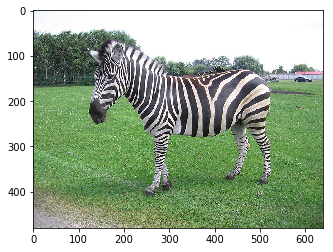

[0.9971256852149963, 0.9970935583114624, 0.9970693588256836, 0.9970450401306152, 0.9969819784164429, 0.9969784021377563, 0.9969775080680847, 0.9969757199287415, 0.9969720244407654, 0.9969689846038818, 0.9969606399536133, 0.9969584941864014, 0.9969536066055298, 0.9969466924667358, 0.9969433546066284, 0.9969432950019836, 0.9969425201416016, 0.9969369173049927, 0.9969362020492554, 0.9969322681427002, 0.9969290494918823, 0.9969255924224854, 0.9969238638877869, 0.9969225525856018, 0.9969217777252197, 0.996916651725769, 0.9969115853309631, 0.9969108700752258, 0.9969075918197632, 0.9969047904014587, 0.9968992471694946, 0.9968985319137573, 0.9968981742858887, 0.9968980550765991, 0.9968961477279663, 0.9968933463096619, 0.9968932867050171, 0.9968927502632141, 0.9968869090080261, 0.9968865513801575, 0.9968826174736023, 0.9968810677528381, 0.9968771934509277, 0.9968767166137695, 0.9968758821487427, 0.9968710541725159, 0.9968706965446472, 0.9968692064285278, 0.9968690276145935, 0.9968675374984741]


In [9]:
show_example()

In [37]:
# Get statistics of similarities
def get_stats(sims):
    flat_sims = flatten(sims)
    mean_f = np.mean(flat_sims)
    median_f = np.median(flat_sims)
    var_f = np.var(flat_sims)
    mean_p = np.mean([np.mean(l) for l in sims])
    median_p = np.mean([np.median(l) for l in sims])
    var_p = np.mean([np.var(l) for l in sims])
    min_f = min(flat_sims)
    max_f = max(flat_sims)
    return mean_f, median_f, var_f, mean_p, median_p, var_p, min_f, max_f

get_stats(sims_1)

(1.6263582695363252,
 1.6212111711502075,
 0.004775373925211002,
 1.6263582695363252,
 1.6263582695363252,
 0.0,
 1.39810311794281,
 2.0086607933044434)

In [28]:
get_stats(sims_5)

(6.829787437829084,
 6.667489528656006,
 0.6705396997903614,
 6.829787437829084,
 6.80613557949347,
 0.012209313885166216,
 5.338106155395508,
 11.459478378295898)

In [29]:
get_stats(sims_10)

(6.744242763535992,
 6.58176589012146,
 0.6722503058321967,
 6.744242763535992,
 6.71370947599604,
 0.01480770080881938,
 5.252965927124023,
 11.459478378295898)

In [30]:
get_stats(sims_50)

(6.4871048686448,
 6.325547933578491,
 0.6698477339403313,
 6.4871048686448,
 6.441348068977637,
 0.025903351534079105,
 4.974234104156494,
 11.459478378295898)

In [62]:
import pandas as pd

i = [get_stats(sims_1), get_stats(sims_5), get_stats(sims_10), get_stats(sims_50)]
i

[(0.0027860929322265572,
  0.0026405903045088053,
  4.88755654700291e-07,
  0.0027860929322265572,
  0.0027860929322265572,
  0.0,
  0.001309834304265678,
  0.010462812148034573),
 (0.0028773917642477384,
  0.0027208973187953234,
  5.4325341839732e-07,
  0.0028773917642477384,
  0.0028912623737766944,
  5.014614633226838e-09,
  0.001309834304265678,
  0.011758980341255665),
 (0.0029296362891516508,
  0.002766742603853345,
  5.769918794460889e-07,
  0.002929636289151651,
  0.0029469361099336766,
  6.641891880002564e-09,
  0.001309834304265678,
  0.011958119459450245),
 (0.0030794056352787193,
  0.0028976083267480135,
  6.817047864624401e-07,
  0.0030794056352787197,
  0.0031043842070028953,
  1.1281171960451135e-08,
  0.001309834304265678,
  0.012971612624824047)]

In [63]:
df = pd.DataFrame(i, index = ["Top-1", "Top-5", "Top-10", "Top-50"], columns = ["Mean F", "Median F", "Variance F", "Mean P", "Median P", "Variance P", "Min F", "Max F"])
print(df.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Mean F</th>
      <th>Median F</th>
      <th>Variance F</th>
      <th>Mean P</th>
      <th>Median P</th>
      <th>Variance P</th>
      <th>Min F</th>
      <th>Max F</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Top-1</th>
      <td>0.002786</td>
      <td>0.002641</td>
      <td>4.887557e-07</td>
      <td>0.002786</td>
      <td>0.002786</td>
      <td>0.000000e+00</td>
      <td>0.00131</td>
      <td>0.010463</td>
    </tr>
    <tr>
      <th>Top-5</th>
      <td>0.002877</td>
      <td>0.002721</td>
      <td>5.432534e-07</td>
      <td>0.002877</td>
      <td>0.002891</td>
      <td>5.014615e-09</td>
      <td>0.00131</td>
      <td>0.011759</td>
    </tr>
    <tr>
      <th>Top-10</th>
      <td>0.002930</td>
      <td>0.002767</td>
      <td>5.769919e-07</td>
      <td>0.002930</td>
      <td>0.002947</td>
      <td>6.641892e-09</td>
      <td>0.00131</td>


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Mean F</th>
      <th>Median F</th>
      <th>Variance F</th>
      <th>Mean P</th>
      <th>Median P</th>
      <th>Variance P</th>
      <th>Min F</th>
      <th>Max F</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Top-1</th>
      <td>0.002786</td>
      <td>0.002641</td>
      <td>4.887557e-07</td>
      <td>0.002786</td>
      <td>0.002786</td>
      <td>0.000000e+00</td>
      <td>0.00131</td>
      <td>0.010463</td>
    </tr>
    <tr>
      <th>Top-5</th>
      <td>0.002877</td>
      <td>0.002721</td>
      <td>5.432534e-07</td>
      <td>0.002877</td>
      <td>0.002891</td>
      <td>5.014615e-09</td>
      <td>0.00131</td>
      <td>0.011759</td>
    </tr>
    <tr>
      <th>Top-10</th>
      <td>0.002930</td>
      <td>0.002767</td>
      <td>5.769919e-07</td>
      <td>0.002930</td>
      <td>0.002947</td>
      <td>6.641892e-09</td>
      <td>0.00131</td>
      <td>0.011958</td>
    </tr>
    <tr>
      <th>Top-50</th>
      <td>0.003079</td>
      <td>0.002898</td>
      <td>6.817048e-07</td>
      <td>0.003079</td>
      <td>0.003104</td>
      <td>1.128117e-08</td>
      <td>0.00131</td>
      <td>0.012972</td>
    </tr>
  </tbody>
</table>


In [22]:
import pandas as pd
from tabulate import tabulate

def pandas_df_to_markdown_table(df):
    # Dependent upon ipython
    # shamelessly stolen from https://stackoverflow.com/questions/33181846/programmatically-convert-pandas-dataframe-to-markdown-table
    from IPython.display import Markdown, display
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
    #display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    return Markdown(df_formatted.to_csv(sep="|", index=False))
#     return df_formatted

def df_to_markdown(df, y_index=False):
    blob = tabulate(df, headers='keys', tablefmt='pipe')
    if not y_index:
        # Remove the index with some creative splicing and iteration
        return '\n'.join(['| {}'.format(row.split('|', 2)[-1]) for row in blob.split('\n')])
    return blob

pandas_df_to_markdown_table(df)

Mean F|Median F|Variance F|Mean P|Median P|Variance P|Min F|Max F
---|---|---|---|---|---|---|---
2.3442443529244485|2.2978403568267822|0.07880345899389789|2.3442443529244485|2.3442443529244485|0.0|1.6694693565368652|4.186770915985107
2.3818504285048014|2.332908868789673|0.08458811871393719|2.3818504285048014|2.3876152979527387|0.0007740481928404246|1.6694693565368652|4.350179195404053
2.4030066981599356|2.352294921875|0.08808345067954619|2.4030066981599356|2.4102142329315828|0.0010004018530499312|1.6694693565368652|4.3885955810546875
2.4624470461116896|2.4072914123535156|0.0984176091845847|2.46244704611169|2.4724999509503665|0.0015998329723058795|1.6694693565368652|4.574464797973633
